<a href="https://colab.research.google.com/github/manishiitg/ML_Experiments/blob/master/pytorch/101/pytorch_getting_start_LR_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This code is to learn basic of pytoch and getting started with ML/Deep Learning

In [0]:
#https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


Setting up some random data to solve a linear regression problem 

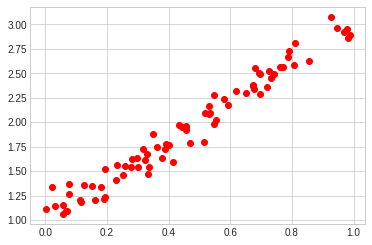

In [3]:

np.random.seed(69)

x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

plt.plot(x_train, y_train, 'o', color='red')






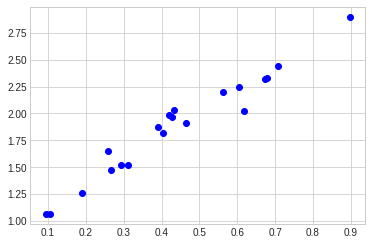

In [4]:
plt.plot(x_val, y_val, 'o', color='blue')

Solving LR with simply numpy array and math

In [5]:
np.random.seed(69)

a = np.random.randn(1)
b = np.random.randn(1)

print(a, b)
# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train
    
    # How wrong is our model? That's the error! 
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()

    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad

print(a, b)


# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[0.9155071] [-0.60354197]
[1.00907371] [2.00651272]
[1.00906796] [2.00652444]


In [7]:
!pip install torchviz

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=9a824201876bae20c8ed6b925a09105f727ea936b9117fca1b9cdae9d471c104
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [12]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
# and then we send them to the chosen device
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Here we can see the difference - notice that .type() is more useful
# since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

torch.manual_seed(69)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print("initial values of a,b")
print(a, b)

n_epochs = 100

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    print("gradient before: ", a.grad,b.grad)

    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    # backward() function automatically calculates gradients for all variables which has requires_grad=True set
    # loss is a variable which is associated to a,b using the loss we defined above
    # loss => error => yhat => a,b
    loss.backward()
    # Let's check the computed gradients...
    print("gradient after:", a.grad,b.grad)

    with torch.no_grad():  # doing this i.e no_grad because we don't want to pytorch to store the gradients again 
      a -= lr * a.grad
      b -= lr * b.grad
      # we update the variables 

    a.grad.zero_()
    b.grad.zero_()
    # setting gradients to zero again
    
print("final values", a, b)

# this is one of the most critical and fundamental packages of pytorch https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html 
# called "autograd"

cpu
<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor
initial values of a,b
tensor([-0.5259], requires_grad=True) tensor([-2.6043], requires_grad=True)
gradient before:  None None
gradient after: tensor([-7.3181]) tensor([-4.0500])
gradient before:  tensor([0.]) tensor([0.])
gradient after: tensor([-5.4814]) tensor([-3.1442])
gradient before:  tensor([0.]) tensor([0.])
gradient after: tensor([-4.0954]) tensor([-2.4594])
gradient before:  tensor([0.]) tensor([0.])
gradient after: tensor([-3.0497]) tensor([-1.9415])
gradient before:  tensor([0.]) tensor([0.])
gradient after: tensor([-2.2609]) tensor([-1.5495])
gradient before:  tensor([0.]) tensor([0.])
gradient after: tensor([-1.6659]) tensor([-1.2527])
gradient before:  tensor([0.]) tensor([0.])
gradient after: tensor([-1.2173]) tensor([-1.0276])
gradient before:  tensor([0.]) tensor([0.])
gradient after: tensor([-0.8792]) tensor([-0.8567])
gradient before:  tensor([0.]) tensor([0.])
gradient after: tensor([-0.6244]) ten

Pytorch Dynamic Computations Graphs

https://ai.stackexchange.com/questions/3801/what-is-a-dynamic-computational-graph

In [0]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

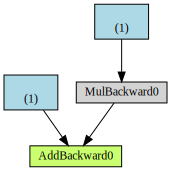

In [0]:
make_dot(yhat) 

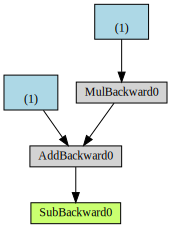

In [0]:
make_dot(error) 

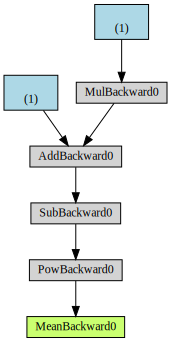

In [0]:
make_dot(loss) 

LR => Optmizer

In [0]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

lr = 1e-1
n_epochs = 1000

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    loss.backward()    
    
    # No more manual update!
    # with torch.no_grad():
    #     a -= lr * a.grad
    #     b -= lr * b.grad
    optimizer.step() 
    
    # No more telling PyTorch to let gradients go!
    # a.grad.zero_()
    # b.grad.zero_()
    optimizer.zero_grad()
    
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0091], requires_grad=True) tensor([2.0065], requires_grad=True)


LR => Loss Function

In [0]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

lr = 1e-1
n_epochs = 1000

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    
    # No more manual loss!
    # error = y_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(y_train_tensor, yhat)

    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0091], requires_grad=True) tensor([2.0065], requires_grad=True)


At this stage we have covered the very basics of pytorch and also solved LR problem using it 